<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/MP_Template_de_Machine_Learnig_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1° Entender o Problema de Negócio:

Construir uma Máquina Preditiva de aprendizado de máquina para prever com precisão se os pacientes no conjunto de dados têm ou não diabetes

![](https://resultadosdigitais.com.br/files/2020/07/pasted-image-0-11.png)

#2° Análise Exploratória dos Dados
Fonte de Dados:

https://www.kaggle.com/uciml/pima-indians-diabetes-database

![](https://miro.medium.com/max/1400/1*ycIMlwgwicqlO6PcFRA-Iw.png
)

In [1]:
# Importar Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb

In [3]:
# Conexão com os Dados
dataset = pd.read_csv('/content/diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#Dimensões
dataset.shape

(768, 9)

In [5]:
# Overview de Informações gerais do Dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Teste de Missing

dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Verificar se Existe Registro Duplicado

dataset.duplicated().sum()

0

In [10]:
# Verificação das Estatísticas das Variáveis
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 0, 'Quantidade')

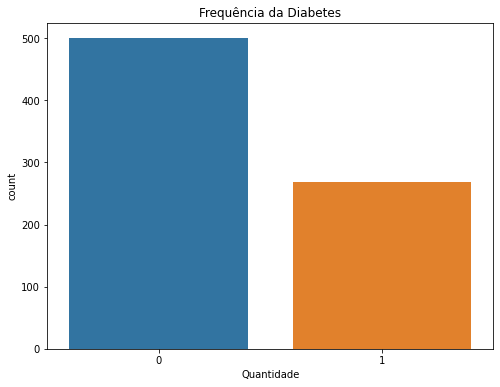

In [14]:
# Visualização Gráfica do Target
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Outcome", data=dataset)
plt.title('Frequência da Diabetes')
plt.xlabel('Quantidade')

# 3° Pré-Processamento dos Dados 

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
dataset.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [18]:
# Separação das Variáveis Explicativas
x = dataset.values[ :  , :8]
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [19]:
# Separação(split) do Target
y= dataset.values[ :  , 8]
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [42]:
# Amostragem: Separar dados para o Treino e para a avaliação da Máquina Preditiva (teste)
x_treino , x_teste , y_treino , y_teste = train_test_split (x , y , test_size= 0.2 , random_state=7 )


In [43]:
x_treino

array([[5.00e+00, 1.08e+02, 7.20e+01, ..., 3.61e+01, 2.63e-01, 3.30e+01],
       [2.00e+00, 1.02e+02, 8.60e+01, ..., 4.55e+01, 1.27e-01, 2.30e+01],
       [4.00e+00, 1.58e+02, 7.80e+01, ..., 3.29e+01, 8.03e-01, 3.10e+01],
       ...,
       [0.00e+00, 5.70e+01, 6.00e+01, ..., 2.17e+01, 7.35e-01, 6.70e+01],
       [1.00e+00, 1.05e+02, 5.80e+01, ..., 2.43e+01, 1.87e-01, 2.10e+01],
       [8.00e+00, 1.79e+02, 7.20e+01, ..., 3.27e+01, 7.19e-01, 3.60e+01]])

In [44]:
x_teste

array([[  1.   ,  90.   ,  62.   , ...,  27.2  ,   0.58 ,  24.   ],
       [  7.   , 181.   ,  84.   , ...,  35.9  ,   0.586,  51.   ],
       [ 13.   , 152.   ,  90.   , ...,  26.8  ,   0.731,  43.   ],
       ...,
       [  0.   , 128.   ,  68.   , ...,  30.5  ,   1.391,  25.   ],
       [  2.   , 100.   ,  66.   , ...,  32.9  ,   0.867,  28.   ],
       [  2.   ,  91.   ,  62.   , ...,  27.3  ,   0.525,  22.   ]])

In [22]:
y_treino

array([0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0.

In [23]:
y_teste

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0.])

# 4° Contruir Máquinas Preditivas

In [26]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [34]:
# Regressão Logistica
maquina_preditiva_rl = LogisticRegression()

In [40]:
#treinamento
ypred_rl = maquina_preditiva_rl.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [46]:
# Lightgbm
maquina_preditiva_LGB = lgb.LGBMClassifier()

In [47]:
ypred_LGB = maquina_preditiva_LGB.fit(x_treino, y_treino)


In [49]:
# Xgboost
maquina_preditiva_XGboost = xgb.XGBClassifier()

In [50]:
#treinamento XGBOOST
ypred_XBboost = maquina_preditiva_XGboost.fit(x_treino, y_treino)

In [51]:
ypred_XBboost = maquina_preditiva_XGboost.fit(x_treino, y_treino)

# 5° Avaliação da Máquina Preditivas

In [45]:
# Avaliação da Regressão Logistica (Baseline)
result_rl = maquina_preditiva_rl.score(x_teste, y_teste)
result_rl

0.7922077922077922

In [48]:
# Avaliação da LGBM
result_LGB = maquina_preditiva_LGB.score(x_teste, y_teste)
result_LGB

0.7467532467532467

In [53]:
# Avaliação da XGboost
result_XGboost = maquina_preditiva_XGboost.score(x_teste, y_teste)
result_XGboost

0.8116883116883117

# 6° Deploy - Implementa a Máquina - Webapp - Sistema Web

# Streamlit
# Flask
# Django
# GCP